In [13]:
using CSV
using DataFrames
using Turing
using StatisticalRethinking
using StatsBase
using StatsPlots

default(label=false)

# 5.1 Spurious association

Code 5.1

In [4]:
d = DataFrame(CSV.File("data/WaffleDivorce.csv"))
d[!,:D] = standardize(ZScoreTransform, d.Divorce)
d[!,:M] = standardize(ZScoreTransform, d.Marriage)
d[!,:A] = standardize(ZScoreTransform, d.MedianAgeMarriage);

Code 5.2

In [6]:
std(d.MedianAgeMarriage)

1.2436303013880823

Code 5.3

In [11]:
Random.seed!(100)

@model function model_m5_1(age, divorce)
    σ ~ Exponential(1)
    a ~ Normal(0, 0.2)
    bA ~ Normal(0, 0.5)
    μ = a .+ bA .* age
    divorce ~ MvNormal(μ, σ)
end

m5_1 = sample(model_m5_1(d.A, d.D), NUTS(), 1000)
prior = sample(model_m5_1([0], [0]), Prior(), 1000)
prior_df = DataFrame(prior);

┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /home/shmuma/.julia/packages/Turing/gwWVN/src/inference/hmc.jl:188


Code 5.4

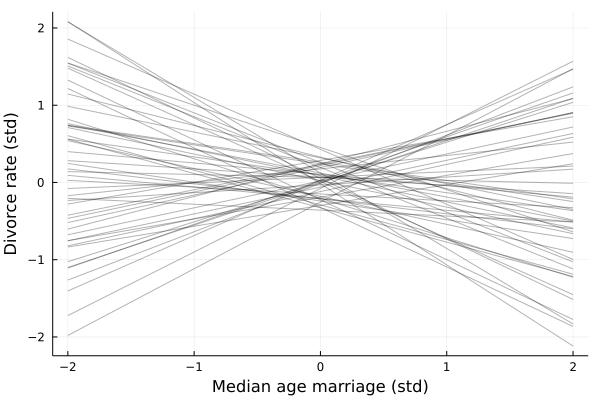

In [14]:
# calculate μ for every prior sample on age=-2 and age=2
bounds = [-2, 2]
μ = StatisticalRethinking.link(prior_df, [:a, :bA], bounds)
μ = hcat(μ...);

p = plot(xlab="Median age marriage (std)", ylab="Divorce rate (std)")
for μₚ ∈ first(eachrow(μ), 50)
    plot!(bounds, μₚ; c=:black, alpha=0.3)
end
display(p)